In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Create the dataset
data = [
    {"ID": 1, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": True},
    {"ID": 2, "CREDIT_HISTORY": "paid", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 3, "CREDIT_HISTORY": "paid", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 4, "CREDIT_HISTORY": "paid", "GUARANTOR_COAPPLICANT": "guarantor", "ACCOMMODATION": "rent", "FRAUD": True},
    {"ID": 5, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 6, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": True},
    {"ID": 7, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 8, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 9, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "rent", "FRAUD": False},
    {"ID": 10, "CREDIT_HISTORY": "none", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": True},
    {"ID": 11, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "coapplicant", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 12, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": True},
    {"ID": 13, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "rent", "FRAUD": True},
    {"ID": 14, "CREDIT_HISTORY": "paid", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 15, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 16, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 17, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "coapplicant", "ACCOMMODATION": "rent", "FRAUD": False},
    {"ID": 18, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "free", "FRAUD": False},
    {"ID": 19, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False},
    {"ID": 20, "CREDIT_HISTORY": "paid", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "FRAUD": False}
]

In [38]:
# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset:")
display(df)

Dataset:


,ID,CREDIT_HISTORY,GUARANTOR_COAPPLICANT,ACCOMMODATION,FRAUD
0,1,current,none,own,True
1,2,paid,none,own,False
2,3,paid,none,own,False
3,4,paid,guarantor,rent,True
4,5,arrears,none,own,False
5,6,arrears,none,own,True
6,7,current,none,own,False
7,8,arrears,none,own,False
8,9,current,none,rent,False
9,10,none,none,own,True


In [39]:
# 1. Dataset Statistics
print("\n1. Dataset Statistics:")
print(f"Total instances: {len(df)}")
print(f"Fraudulent instances: {df['FRAUD'].sum()}")
print(f"Non-fraudulent instances: {len(df) - df['FRAUD'].sum()}")


1. Dataset Statistics:
Total instances: 20
Fraudulent instances: 6
Non-fraudulent instances: 14


In [40]:
# Calculate prior probabilities
prior_fraud = df['FRAUD'].mean()
prior_non_fraud = 1 - prior_fraud
print(f"\nPrior Probabilities:")
print(f"P(FRAUD=True) = {prior_fraud:.4f}")
print(f"P(FRAUD=False) = {prior_non_fraud:.4f}")


Prior Probabilities:
P(FRAUD=True) = 0.3000
P(FRAUD=False) = 0.7000


In [41]:
# 2. Calculate Raw Conditional Probabilities
def get_conditional_prob(df, feature, value, fraud, smooth=False, k=0):
    """Calculate P(feature=value | FRAUD=fraud) with optional smoothing"""
    subset = df[df['FRAUD'] == fraud]
    count = sum(subset[feature] == value)
    total = len(subset)
    
    if smooth:
        # Apply Laplace smoothing
        domain_size = len(df[feature].unique())
        return (count + k) / (total + k * domain_size)
    else:
        # Raw probability
        return count / total if total > 0 else 0

In [42]:
print("\n2. Raw Conditional Probabilities:")
# Initialize dictionaries to store probabilities
raw_probs = {'True': {}, 'False': {}}
features = ['CREDIT_HISTORY', 'GUARANTOR_COAPPLICANT', 'ACCOMMODATION']
# Calculate raw conditional probabilities
for fraud in [True, False]:
    print(f"\nFor FRAUD = {fraud}:")
    for feature in features:
        raw_probs[str(fraud)][feature] = {}
        print(f"  {feature}:")
        for value in sorted(df[feature].unique()):
            prob = get_conditional_prob(df, feature, value, fraud)
            raw_probs[str(fraud)][feature][value] = prob
            print(f"    P({feature}={value} | FRAUD={fraud}) = {prob:.4f}")


2. Raw Conditional Probabilities:

For FRAUD = True:
  CREDIT_HISTORY:
    P(CREDIT_HISTORY=arrears | FRAUD=True) = 0.1667
    P(CREDIT_HISTORY=current | FRAUD=True) = 0.5000
    P(CREDIT_HISTORY=none | FRAUD=True) = 0.1667
    P(CREDIT_HISTORY=paid | FRAUD=True) = 0.1667
  GUARANTOR_COAPPLICANT:
    P(GUARANTOR_COAPPLICANT=coapplicant | FRAUD=True) = 0.0000
    P(GUARANTOR_COAPPLICANT=guarantor | FRAUD=True) = 0.1667
    P(GUARANTOR_COAPPLICANT=none | FRAUD=True) = 0.8333
  ACCOMMODATION:
    P(ACCOMMODATION=free | FRAUD=True) = 0.0000
    P(ACCOMMODATION=own | FRAUD=True) = 0.6667
    P(ACCOMMODATION=rent | FRAUD=True) = 0.3333

For FRAUD = False:
  CREDIT_HISTORY:
    P(CREDIT_HISTORY=arrears | FRAUD=False) = 0.4286
    P(CREDIT_HISTORY=current | FRAUD=False) = 0.2857
    P(CREDIT_HISTORY=none | FRAUD=False) = 0.0000
    P(CREDIT_HISTORY=paid | FRAUD=False) = 0.2857
  GUARANTOR_COAPPLICANT:
    P(GUARANTOR_COAPPLICANT=coapplicant | FRAUD=False) = 0.1429
    P(GUARANTOR_COAPPLICANT=

In [43]:
# 2.1 Calculate for specific query
print("\n2.1 Calculation for specific query:")
query = {
    "CREDIT_HISTORY": "paid",
    "GUARANTOR_COAPPLICANT": "none",
    "ACCOMMODATION": "rent"
}
print(f"Query instance: {query}")
# Check if there's an exact match in the dataset
exact_match = df[(df['CREDIT_HISTORY'] == query['CREDIT_HISTORY']) & 
                (df['GUARANTOR_COAPPLICANT'] == query['GUARANTOR_COAPPLICANT']) &
                (df['ACCOMMODATION'] == query['ACCOMMODATION'])]

if len(exact_match) > 0:
    print("Found an exact match in the dataset:")
    display(exact_match)
else:
    print("No exact match found in the dataset for this query.")


2.1 Calculation for specific query:
Query instance: {'CREDIT_HISTORY': 'paid', 'GUARANTOR_COAPPLICANT': 'none', 'ACCOMMODATION': 'rent'}
No exact match found in the dataset for this query.


In [44]:
# Calculate for FRAUD=True using raw probabilities
prob_true = prior_fraud
print("\nFor FRAUD = True:")
for feature, value in query.items():
    feature_prob = raw_probs['True'][feature][value]
    print(f"P({feature}={value} | FRAUD=True) = {feature_prob:.4f}")
    prob_true *= feature_prob

print(f"P(y=fr) = {prior_fraud:.4f}")
print(f"∏P(q_d|y=fr) × P(y=fr) = {prob_true:.4f}")


For FRAUD = True:
P(CREDIT_HISTORY=paid | FRAUD=True) = 0.1667
P(GUARANTOR_COAPPLICANT=none | FRAUD=True) = 0.8333
P(ACCOMMODATION=rent | FRAUD=True) = 0.3333
P(y=fr) = 0.3000
∏P(q_d|y=fr) × P(y=fr) = 0.0139


In [45]:
# Calculate for FRAUD=False using raw probabilities
prob_false = prior_non_fraud
print("\nFor FRAUD = False:")
for feature, value in query.items():
    feature_prob = raw_probs['False'][feature][value]
    print(f"P({feature}={value} | FRAUD=False) = {feature_prob:.4f}")
    prob_false *= feature_prob
print(f"P(y=¬fr) = {prior_non_fraud:.4f}")
print(f"∏P(q_d|y=¬fr) × P(y=¬fr) = {prob_false:.4f}")


For FRAUD = False:
P(CREDIT_HISTORY=paid | FRAUD=False) = 0.2857
P(GUARANTOR_COAPPLICANT=none | FRAUD=False) = 0.8571
P(ACCOMMODATION=rent | FRAUD=False) = 0.1429
P(y=¬fr) = 0.7000
∏P(q_d|y=¬fr) × P(y=¬fr) = 0.0245


In [46]:
# Decision based on raw probabilities
print("\nBased on raw probabilities:")
if prob_true > prob_false:
    print("The loan application is more likely to be FRAUDULENT.")
else:
    print("The loan application is more likely to be NON-FRAUDULENT.")


Based on raw probabilities:
The loan application is more likely to be NON-FRAUDULENT.


In [47]:
# 3. Apply Laplace Smoothing with k=3
k = 3
print(f"\n3. Applying Laplace Smoothing (k={k}):")

smoothed_probs = {'True': {}, 'False': {}}

for fraud in [True, False]:
    print(f"\nFor FRAUD = {fraud}:")
    for feature in features:
        smoothed_probs[str(fraud)][feature] = {}
        print(f"  {feature}:")
        domain_size = len(df[feature].unique())
        fraud_count = sum(df['FRAUD'] == fraud)
        
        for value in sorted(df[feature].unique()):
            # Count occurrences in the subset
            count = sum((df[feature] == value) & (df['FRAUD'] == fraud))
            
            # Apply smoothing formula
            prob = get_conditional_prob(df, feature, value, fraud, smooth=True, k=k)
            smoothed_probs[str(fraud)][feature][value] = prob
            
            # Display calculation
            print(f"    P({feature}={value} | FRAUD={fraud}) = ({count} + {k}) / ({fraud_count} + {k} × {domain_size}) = {prob:.4f}")



3. Applying Laplace Smoothing (k=3):

For FRAUD = True:
  CREDIT_HISTORY:
    P(CREDIT_HISTORY=arrears | FRAUD=True) = (1 + 3) / (6 + 3 × 4) = 0.2222
    P(CREDIT_HISTORY=current | FRAUD=True) = (3 + 3) / (6 + 3 × 4) = 0.3333
    P(CREDIT_HISTORY=none | FRAUD=True) = (1 + 3) / (6 + 3 × 4) = 0.2222
    P(CREDIT_HISTORY=paid | FRAUD=True) = (1 + 3) / (6 + 3 × 4) = 0.2222
  GUARANTOR_COAPPLICANT:
    P(GUARANTOR_COAPPLICANT=coapplicant | FRAUD=True) = (0 + 3) / (6 + 3 × 3) = 0.2000
    P(GUARANTOR_COAPPLICANT=guarantor | FRAUD=True) = (1 + 3) / (6 + 3 × 3) = 0.2667
    P(GUARANTOR_COAPPLICANT=none | FRAUD=True) = (5 + 3) / (6 + 3 × 3) = 0.5333
  ACCOMMODATION:
    P(ACCOMMODATION=free | FRAUD=True) = (0 + 3) / (6 + 3 × 3) = 0.2000
    P(ACCOMMODATION=own | FRAUD=True) = (4 + 3) / (6 + 3 × 3) = 0.4667
    P(ACCOMMODATION=rent | FRAUD=True) = (2 + 3) / (6 + 3 × 3) = 0.3333

For FRAUD = False:
  CREDIT_HISTORY:
    P(CREDIT_HISTORY=arrears | FRAUD=False) = (6 + 3) / (14 + 3 × 4) = 0.3462
  

In [48]:
# 4. Create detailed table for GC=GUARANTOR_COAPPLICANT feature as shown in the image
print("\n4. Detailed Table for GUARANTOR_COAPPLICANT feature (FRAUD=False):")

# Raw probabilities
gc_raw_none = raw_probs['False']['GUARANTOR_COAPPLICANT']['none']
gc_raw_guarantor = raw_probs['False']['GUARANTOR_COAPPLICANT']['guarantor']
gc_raw_coapplicant = raw_probs['False']['GUARANTOR_COAPPLICANT']['coapplicant']

# Counts for parameters
gc_total_count = sum(df['FRAUD'] == False)
gc_none_count = sum((df['GUARANTOR_COAPPLICANT'] == 'none') & (df['FRAUD'] == False))
gc_guarantor_count = sum((df['GUARANTOR_COAPPLICANT'] == 'guarantor') & (df['FRAUD'] == False))
gc_coapplicant_count = sum((df['GUARANTOR_COAPPLICANT'] == 'coapplicant') & (df['FRAUD'] == False))
gc_domain_size = len(df['GUARANTOR_COAPPLICANT'].unique())

# Smoothed probabilities
gc_smoothed_none = smoothed_probs['False']['GUARANTOR_COAPPLICANT']['none']
gc_smoothed_guarantor = smoothed_probs['False']['GUARANTOR_COAPPLICANT']['guarantor']
gc_smoothed_coapplicant = smoothed_probs['False']['GUARANTOR_COAPPLICANT']['coapplicant']

# Create tables as in the image
raw_probs_table = pd.DataFrame({
    "Raw Probabilities": ["P(GC = none | ¬fr)", "P(GC = guarantor | ¬fr)", "P(GC = coapplicant | ¬fr)"],
    "=": ["=", "=", "="],
    "Value": [f"{gc_raw_none:.4f}", f"{gc_raw_guarantor:.4f}", f"{gc_raw_coapplicant:.4f}"]
})

smoothing_params_table = pd.DataFrame({
    "Smoothing Parameters": ["k", "count(GC | ¬fr)", "count(GC = none | ¬fr)", 
                             "count(GC = guarantor | ¬fr)", "count(GC = coapplicant | ¬fr)", "|Domain(GC)|"],
    "=": ["=", "=", "=", "=", "=", "="],
    "Value": [f"{k}", f"{gc_total_count}", f"{gc_none_count}", 
              f"{gc_guarantor_count}", f"{gc_coapplicant_count}", f"{gc_domain_size}"]
})

smoothed_probs_table = pd.DataFrame({
    "Smoothed Probabilities": ["P(GC = none | ¬fr)", "P(GC = guarantor | ¬fr)", "P(GC = coapplicant | ¬fr)"],
    "=": ["=", "=", "="],
    "Value": [f"{gc_smoothed_none:.4f}", f"{gc_smoothed_guarantor:.4f}", f"{gc_smoothed_coapplicant:.4f}"]
})

# Display tables
print("\nRaw Probabilities:")
display(raw_probs_table)

print("\nSmoothing Parameters:")
display(smoothing_params_table)

print("\nSmoothed Probabilities:")
display(smoothed_probs_table)


4. Detailed Table for GUARANTOR_COAPPLICANT feature (FRAUD=False):

Raw Probabilities:


,Raw Probabilities,=,Value
0,P(GC = none | ¬fr),=,0.8571
1,P(GC = guarantor | ¬fr),=,0.0000
2,P(GC = coapplicant | ¬fr),=,0.1429



Smoothing Parameters:


,Smoothing Parameters,=,Value
0,k,=,3
1,count(GC | ¬fr),=,14
2,count(GC = none | ¬fr),=,12
3,count(GC = guarantor | ¬fr),=,0
4,count(GC = coapplicant | ¬fr),=,2
5,|Domain(GC)|,=,3



Smoothed Probabilities:


,Smoothed Probabilities,=,Value
0,P(GC = none | ¬fr),=,0.6522
1,P(GC = guarantor | ¬fr),=,0.1304
2,P(GC = coapplicant | ¬fr),=,0.2174


In [49]:
# 5. Make prediction for query instance
print("\n5. Making Prediction for Query Instance:")
query = {
    "CREDIT_HISTORY": "paid",
    "GUARANTOR_COAPPLICANT": "none",
    "ACCOMMODATION": "rent"
}
print(f"Query instance: {query}")

# Using Naive Bayes with smoothed probabilities
def naive_bayes_predict(query, prior_fraud, prior_non_fraud, smoothed_probs):
    # Calculate for FRAUD=True
    prob_true = prior_fraud
    for feature, value in query.items():
        prob_true *= smoothed_probs['True'][feature][value]
    
    # Calculate for FRAUD=False
    prob_false = prior_non_fraud
    for feature, value in query.items():
        prob_false *= smoothed_probs['False'][feature][value]
    
    # Normalize
    total = prob_true + prob_false
    return prob_true/total, prob_false/total

# Make prediction
prob_fraud, prob_non_fraud = naive_bayes_predict(
    query, prior_fraud, prior_non_fraud, smoothed_probs
)

print("\nDetailed calculation:")
print("For FRAUD = True:")
for feature, value in query.items():
    print(f"P({feature}={value} | FRAUD=True) = {smoothed_probs['True'][feature][value]:.4f}")

print("\nFor FRAUD = False:")
for feature, value in query.items():
    print(f"P({feature}={value} | FRAUD=False) = {smoothed_probs['False'][feature][value]:.4f}")

print(f"\nP(FRAUD=True | query) = {prob_fraud:.4f}")
print(f"P(FRAUD=False | query) = {prob_non_fraud:.4f}")

if prob_fraud > prob_non_fraud:
    print("\nPrediction: The loan application is likely to be FRAUDULENT.")
else:
    print("\nPrediction: The loan application is likely to be NON-FRAUDULENT.")



5. Making Prediction for Query Instance:
Query instance: {'CREDIT_HISTORY': 'paid', 'GUARANTOR_COAPPLICANT': 'none', 'ACCOMMODATION': 'rent'}

Detailed calculation:
For FRAUD = True:
P(CREDIT_HISTORY=paid | FRAUD=True) = 0.2222
P(GUARANTOR_COAPPLICANT=none | FRAUD=True) = 0.5333
P(ACCOMMODATION=rent | FRAUD=True) = 0.3333

For FRAUD = False:
P(CREDIT_HISTORY=paid | FRAUD=False) = 0.2692
P(GUARANTOR_COAPPLICANT=none | FRAUD=False) = 0.6522
P(ACCOMMODATION=rent | FRAUD=False) = 0.2174

P(FRAUD=True | query) = 0.3073
P(FRAUD=False | query) = 0.6927

Prediction: The loan application is likely to be NON-FRAUDULENT.


In [50]:
#Adding ACCOUNT_BALANCE feature to the dataset
data = [
    {"ID": 1, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 56.75, "LOAN_AMOUNT": 900, "FRAUD": True},
    {"ID": 2, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 1800.11, "LOAN_AMOUNT": 150000, "FRAUD": False},
    {"ID": 3, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 1341.03, "LOAN_AMOUNT": 48000, "FRAUD": False},
    {"ID": 4, "CREDIT_HISTORY": "paid", "GUARANTOR_COAPPLICANT": "guarantor", "ACCOMMODATION": "rent", "ACCOUNT_BALANCE": 749.50, "LOAN_AMOUNT": 10000, "FRAUD": True},
    {"ID": 5, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 1150.00, "LOAN_AMOUNT": 32000, "FRAUD": False},
    {"ID": 6, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 928.30, "LOAN_AMOUNT": 250000, "FRAUD": True},
    {"ID": 7, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 250.90, "LOAN_AMOUNT": 25000, "FRAUD": False},
    {"ID": 8, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 806.15, "LOAN_AMOUNT": 18500, "FRAUD": False},
    {"ID": 9, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "rent", "ACCOUNT_BALANCE": 1209.02, "LOAN_AMOUNT": 20000, "FRAUD": False},
    {"ID": 10, "CREDIT_HISTORY": "none", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 405.72, "LOAN_AMOUNT": 9500, "FRAUD": True},
    {"ID": 11, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "coapplicant", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 550.00, "LOAN_AMOUNT": 16750, "FRAUD": False},
    {"ID": 12, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "free", "ACCOUNT_BALANCE": 223.89, "LOAN_AMOUNT": 9850, "FRAUD": True},
    {"ID": 13, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "rent", "ACCOUNT_BALANCE": 103.23, "LOAN_AMOUNT": 95500, "FRAUD": True},
    {"ID": 14, "CREDIT_HISTORY": "paid", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 758.22, "LOAN_AMOUNT": 65000, "FRAUD": False},
    {"ID": 15, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 430.79, "LOAN_AMOUNT": 500, "FRAUD": False},
    {"ID": 16, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 675.11, "LOAN_AMOUNT": 16000, "FRAUD": False},
    {"ID": 17, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "coapplicant", "ACCOMMODATION": "rent", "ACCOUNT_BALANCE": 1657.20, "LOAN_AMOUNT": 15450, "FRAUD": False},
    {"ID": 18, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "free", "ACCOUNT_BALANCE": 1405.18, "LOAN_AMOUNT": 50000, "FRAUD": False},
    {"ID": 19, "CREDIT_HISTORY": "arrears", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 760.51, "LOAN_AMOUNT": 500, "FRAUD": False},
    {"ID": 20, "CREDIT_HISTORY": "current", "GUARANTOR_COAPPLICANT": "none", "ACCOMMODATION": "own", "ACCOUNT_BALANCE": 985.41, "LOAN_AMOUNT": 35000, "FRAUD": False}
]
df = pd.DataFrame(data)


6. Handling Continuous Features: ACCOUNT_BALANCE

ACCOUNT_BALANCE Statistics:
For FRAUD = True:
  Mean: 411.23
  Std Dev: 325.94
  Min: 56.75
  Max: 928.30

For FRAUD = False:
  Mean: 984.26
  Std Dev: 444.18
  Min: 250.90
  Max: 1800.11


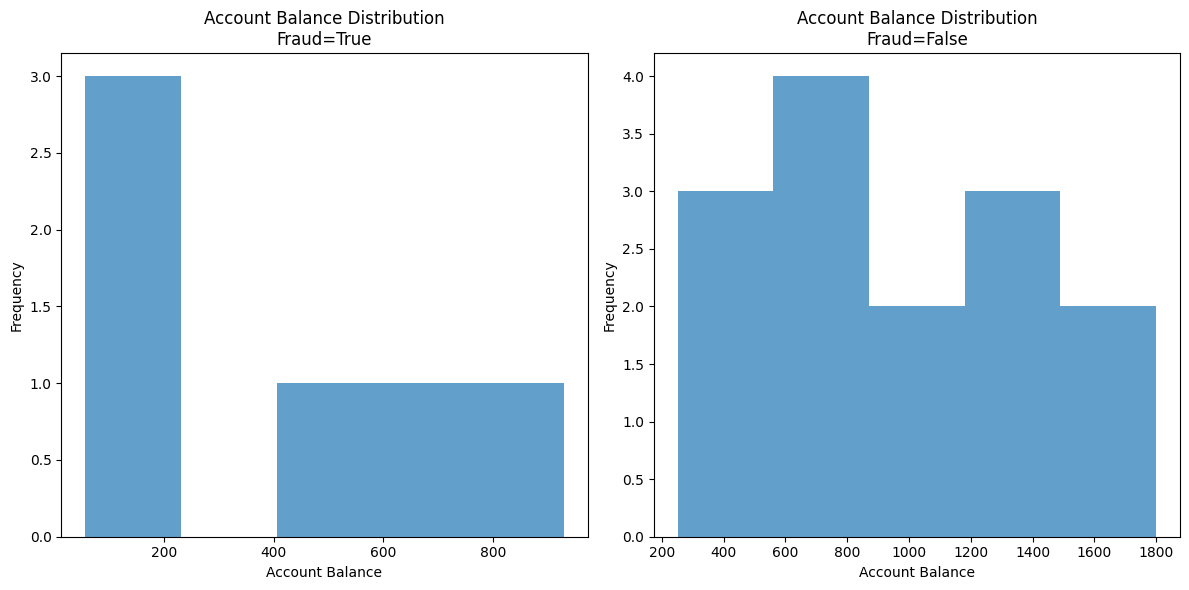

In [51]:
print("\n6. Handling Continuous Features: ACCOUNT_BALANCE")

# Separate the data by fraud status to analyze distributions
fraud_balances = df[df['FRAUD'] == True]['ACCOUNT_BALANCE'].values
non_fraud_balances = df[df['FRAUD'] == False]['ACCOUNT_BALANCE'].values

print("\nACCOUNT_BALANCE Statistics:")
print(f"For FRAUD = True:")
print(f"  Mean: {np.mean(fraud_balances):.2f}")
print(f"  Std Dev: {np.std(fraud_balances):.2f}")
print(f"  Min: {np.min(fraud_balances):.2f}")
print(f"  Max: {np.max(fraud_balances):.2f}")

print(f"\nFor FRAUD = False:")
print(f"  Mean: {np.mean(non_fraud_balances):.2f}")
print(f"  Std Dev: {np.std(non_fraud_balances):.2f}")
print(f"  Min: {np.min(non_fraud_balances):.2f}")
print(f"  Max: {np.max(non_fraud_balances):.2f}")

# Visualize the distributions
plt.figure(figsize=(12, 6))

# Create histograms for account balance by fraud status
plt.subplot(1, 2, 1)
plt.hist(fraud_balances, bins=5, alpha=0.7, label='Fraud=True')
plt.title('Account Balance Distribution\nFraud=True')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(non_fraud_balances, bins=5, alpha=0.7, label='Fraud=False')
plt.title('Account Balance Distribution\nFraud=False')
plt.xlabel('Account Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [52]:
# Fitting distributions to the data
from scipy import stats

# For Fraud=True: Try exponential distribution
fraud_mean = np.mean(fraud_balances)
lambda_param = 1 / fraud_mean
print(f"\nFitting exponential distribution to Fraud=True:")
print(f"λ parameter = 1 / mean = 1 / {fraud_mean:.2f} = {lambda_param:.6f}")



Fitting exponential distribution to Fraud=True:
λ parameter = 1 / mean = 1 / 411.23 = 0.002432



Fitting normal distribution to Fraud=False:
μ parameter = 984.26
σ parameter = 444.18


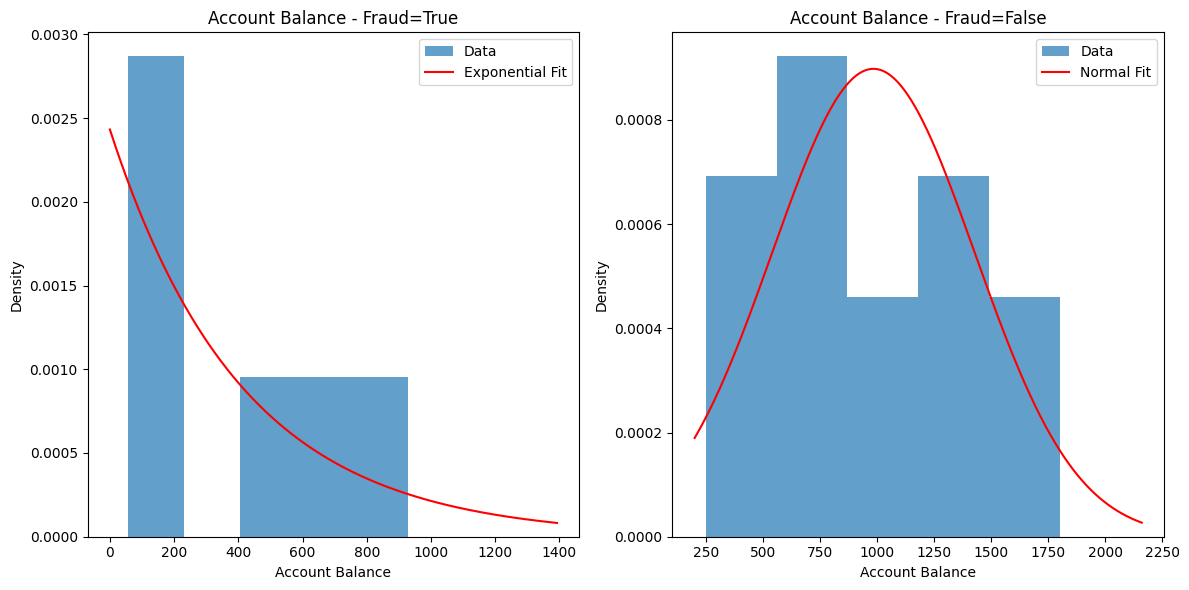

In [53]:
# For Fraud=False: Try normal distribution
non_fraud_mean = np.mean(non_fraud_balances)
non_fraud_std = np.std(non_fraud_balances)
print(f"\nFitting normal distribution to Fraud=False:")
print(f"μ parameter = {non_fraud_mean:.2f}")
print(f"σ parameter = {non_fraud_std:.2f}")

# Plot the fitted distributions
x_exp = np.linspace(0, max(fraud_balances) * 1.5, 1000)
y_exp = stats.expon.pdf(x_exp, scale=1/lambda_param)

x_norm = np.linspace(min(non_fraud_balances) * 0.8, max(non_fraud_balances) * 1.2, 1000)
y_norm = stats.norm.pdf(x_norm, loc=non_fraud_mean, scale=non_fraud_std)

plt.figure(figsize=(12, 6))
# Plot for Fraud=True with fitted exponential
plt.subplot(1, 2, 1)
plt.hist(fraud_balances, bins=5, density=True, alpha=0.7, label='Data')
plt.plot(x_exp, y_exp, 'r-', label='Exponential Fit')
plt.title('Account Balance - Fraud=True')
plt.xlabel('Account Balance')
plt.ylabel('Density')
plt.legend()
# Plot for Fraud=False with fitted normal
plt.subplot(1, 2, 2)
plt.hist(non_fraud_balances, bins=5, density=True, alpha=0.7, label='Data')
plt.plot(x_norm, y_norm, 'r-', label='Normal Fit')
plt.title('Account Balance - Fraud=False')
plt.xlabel('Account Balance')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
# Using the PDFs to calculate probabilities for a query value
query_balance = 800  # Example query balance

# Calculate probability using exponential distribution for Fraud=True
fraud_prob = stats.expon.pdf(query_balance, scale=1/lambda_param)

# Calculate probability using normal distribution for Fraud=False
non_fraud_prob = stats.norm.pdf(query_balance, loc=non_fraud_mean, scale=non_fraud_std)

print(f"\nProbability calculations for Account Balance = {query_balance}:")
print(f"P(Account Balance = {query_balance} | Fraud=True) using exponential dist = {fraud_prob:.6f}")
print(f"P(Account Balance = {query_balance} | Fraud=False) using normal dist = {non_fraud_prob:.6f}")



Probability calculations for Account Balance = 800:
P(Account Balance = 800 | Fraud=True) using exponential dist = 0.000348
P(Account Balance = 800 | Fraud=False) using normal dist = 0.000824


In [55]:
# 8. Binning Continuous Features: LOAN_AMOUNT
print("\n8. Binning Continuous Features: LOAN_AMOUNT")

# Sort the data by LOAN_AMOUNT
df_sorted = df.sort_values(by='LOAN_AMOUNT')
print("\nData sorted by LOAN_AMOUNT (first few rows):")
display(df_sorted.head())

# Equal-frequency binning with 4 bins
num_bins = 4
bin_size = len(df) // num_bins
print(f"\nImplementing equal-frequency binning with {num_bins} bins")
print(f"Bin size (approx): {bin_size} instances per bin")

# Add the bin column
df_sorted['BINNED_LOAN_AMOUNT'] = pd.qcut(df_sorted['LOAN_AMOUNT'], q=num_bins, 
                                          labels=['bin1', 'bin2', 'bin3', 'bin4'])

print("\nData after binning (showing all rows):")
display(df_sorted[['ID', 'LOAN_AMOUNT', 'BINNED_LOAN_AMOUNT', 'FRAUD']])


8. Binning Continuous Features: LOAN_AMOUNT

Data sorted by LOAN_AMOUNT (first few rows):


,ID,CREDIT_HISTORY,GUARANTOR_COAPPLICANT,ACCOMMODATION,ACCOUNT_BALANCE,LOAN_AMOUNT,FRAUD
14,15,arrears,none,own,430.79,500,False
18,19,arrears,none,own,760.51,500,False
0,1,current,none,own,56.75,900,True
9,10,none,none,own,405.72,9500,True
11,12,current,none,free,223.89,9850,True



Implementing equal-frequency binning with 4 bins
Bin size (approx): 5 instances per bin

Data after binning (showing all rows):


,ID,LOAN_AMOUNT,BINNED_LOAN_AMOUNT,FRAUD
14,15,500,bin1,False
18,19,500,bin1,False
0,1,900,bin1,True
9,10,9500,bin1,True
11,12,9850,bin1,True
3,4,10000,bin2,True
16,17,15450,bin2,False
15,16,16000,bin2,False
10,11,16750,bin2,False
7,8,18500,bin2,False


In [56]:
# Calculate raw conditional probabilities for binned feature
bin_raw_probs = {'True': {}, 'False': {}}

for fraud in [True, False]:
    bin_raw_probs[str(fraud)] = {}
    subset = df_sorted[df_sorted['FRAUD'] == fraud]
    total = len(subset)
    
    print(f"\nRaw bin probabilities for FRAUD = {fraud}:")
    for bin_name in ['bin1', 'bin2', 'bin3', 'bin4']:
        count = sum(subset['BINNED_LOAN_AMOUNT'] == bin_name)
        prob = count / total if total > 0 else 0
        bin_raw_probs[str(fraud)][bin_name] = prob
        print(f"P(BINNED_LOAN_AMOUNT = {bin_name} | FRAUD = {fraud}) = {count}/{total} = {prob:.4f}")



Raw bin probabilities for FRAUD = True:
P(BINNED_LOAN_AMOUNT = bin1 | FRAUD = True) = 3/6 = 0.5000
P(BINNED_LOAN_AMOUNT = bin2 | FRAUD = True) = 1/6 = 0.1667
P(BINNED_LOAN_AMOUNT = bin3 | FRAUD = True) = 0/6 = 0.0000
P(BINNED_LOAN_AMOUNT = bin4 | FRAUD = True) = 2/6 = 0.3333

Raw bin probabilities for FRAUD = False:
P(BINNED_LOAN_AMOUNT = bin1 | FRAUD = False) = 2/14 = 0.1429
P(BINNED_LOAN_AMOUNT = bin2 | FRAUD = False) = 4/14 = 0.2857
P(BINNED_LOAN_AMOUNT = bin3 | FRAUD = False) = 5/14 = 0.3571
P(BINNED_LOAN_AMOUNT = bin4 | FRAUD = False) = 3/14 = 0.2143


In [61]:
# Apply Laplace smoothing to bin probabilities
bin_smoothed_probs = {'True': {}, 'False': {}}
k = 3  # Using same k as before

for fraud in [True, False]:
    bin_smoothed_probs[str(fraud)] = {}
    subset = df_sorted[df_sorted['FRAUD'] == fraud]
    total = len(subset)
    domain_size = 4  # 4 bins
    
    print(f"\nSmoothed bin probabilities for FRAUD = {fraud}:")
    for bin_name in ['bin1', 'bin2', 'bin3', 'bin4']:
        count = sum(subset['BINNED_LOAN_AMOUNT'] == bin_name)
        smoothed_prob = (count + k) / (total + k * domain_size)
        bin_smoothed_probs[str(fraud)][bin_name] = smoothed_prob
        print(f"P(BINNED_LOAN_AMOUNT = {bin_name} | FRAUD = {fraud}) = ({count} + {k})/({total} + {k}*{domain_size}) = {smoothed_prob:.4f}")



Smoothed bin probabilities for FRAUD = True:
P(BINNED_LOAN_AMOUNT = bin1 | FRAUD = True) = (3 + 3)/(6 + 3*4) = 0.3333
P(BINNED_LOAN_AMOUNT = bin2 | FRAUD = True) = (1 + 3)/(6 + 3*4) = 0.2222
P(BINNED_LOAN_AMOUNT = bin3 | FRAUD = True) = (0 + 3)/(6 + 3*4) = 0.1667
P(BINNED_LOAN_AMOUNT = bin4 | FRAUD = True) = (2 + 3)/(6 + 3*4) = 0.2778

Smoothed bin probabilities for FRAUD = False:
P(BINNED_LOAN_AMOUNT = bin1 | FRAUD = False) = (2 + 3)/(14 + 3*4) = 0.1923
P(BINNED_LOAN_AMOUNT = bin2 | FRAUD = False) = (4 + 3)/(14 + 3*4) = 0.2692
P(BINNED_LOAN_AMOUNT = bin3 | FRAUD = False) = (5 + 3)/(14 + 3*4) = 0.3077
P(BINNED_LOAN_AMOUNT = bin4 | FRAUD = False) = (3 + 3)/(14 + 3*4) = 0.2308


In [62]:
# 9. Updated prediction with all features
print("\n9. Making updated prediction with all features:")
query = {
    "CREDIT_HISTORY": "paid",
    "GUARANTOR_COAPPLICANT": "none",
    "ACCOMMODATION": "rent",
    "BINNED_LOAN_AMOUNT": "bin3",  # Assuming our query loan amount falls in bin3
    "ACCOUNT_BALANCE": 800
}
print(f"Query instance: {query}")



9. Making updated prediction with all features:
Query instance: {'CREDIT_HISTORY': 'paid', 'GUARANTOR_COAPPLICANT': 'none', 'ACCOMMODATION': 'rent', 'BINNED_LOAN_AMOUNT': 'bin3', 'ACCOUNT_BALANCE': 800}


In [63]:
# Calculate using all features
def naive_bayes_predict_with_continuous(query, prior_fraud, prior_non_fraud, 
                                      smoothed_probs, bin_smoothed_probs, 
                                      lambda_param, non_fraud_mean, non_fraud_std):
    # Calculate for FRAUD=True
    prob_true = prior_fraud
    
    # Categorical features
    for feature in ['CREDIT_HISTORY', 'GUARANTOR_COAPPLICANT', 'ACCOMMODATION']:
        prob_true *= smoothed_probs['True'][feature][query[feature]]
    
    # Binned feature
    prob_true *= bin_smoothed_probs['True'][query['BINNED_LOAN_AMOUNT']]
    
    # Continuous feature using exponential distribution
    balance_prob_true = stats.expon.pdf(query['ACCOUNT_BALANCE'], scale=1/lambda_param)
    prob_true *= balance_prob_true
    
    # Calculate for FRAUD=False
    prob_false = prior_non_fraud
    
    # Categorical features
    for feature in ['CREDIT_HISTORY', 'GUARANTOR_COAPPLICANT', 'ACCOMMODATION']:
        prob_false *= smoothed_probs['False'][feature][query[feature]]
    
    # Binned feature
    prob_false *= bin_smoothed_probs['False'][query['BINNED_LOAN_AMOUNT']]
    
    # Continuous feature using normal distribution
    balance_prob_false = stats.norm.pdf(query['ACCOUNT_BALANCE'], loc=non_fraud_mean, scale=non_fraud_std)
    prob_false *= balance_prob_false
    
    # Normalize
    total = prob_true + prob_false
    return prob_true/total, prob_false/total

In [64]:
# Make prediction with all features
prob_fraud_all, prob_non_fraud_all = naive_bayes_predict_with_continuous(
    query, prior_fraud, prior_non_fraud, smoothed_probs, bin_smoothed_probs,
    lambda_param, non_fraud_mean, non_fraud_std
)

In [65]:
print("\nDetailed calculation with all features:")
print("For FRAUD = True:")
for feature in ['CREDIT_HISTORY', 'GUARANTOR_COAPPLICANT', 'ACCOMMODATION']:
    print(f"P({feature}={query[feature]} | FRAUD=True) = {smoothed_probs['True'][feature][query[feature]]:.4f}")
print(f"P(BINNED_LOAN_AMOUNT={query['BINNED_LOAN_AMOUNT']} | FRAUD=True) = {bin_smoothed_probs['True'][query['BINNED_LOAN_AMOUNT']]:.4f}")
print(f"P(ACCOUNT_BALANCE={query['ACCOUNT_BALANCE']} | FRAUD=True) = {stats.expon.pdf(query['ACCOUNT_BALANCE'], scale=1/lambda_param):.6f}")

print("\nFor FRAUD = False:")
for feature in ['CREDIT_HISTORY', 'GUARANTOR_COAPPLICANT', 'ACCOMMODATION']:
    print(f"P({feature}={query[feature]} | FRAUD=False) = {smoothed_probs['False'][feature][query[feature]]:.4f}")
print(f"P(BINNED_LOAN_AMOUNT={query['BINNED_LOAN_AMOUNT']} | FRAUD=False) = {bin_smoothed_probs['False'][query['BINNED_LOAN_AMOUNT']]:.4f}")
print(f"P(ACCOUNT_BALANCE={query['ACCOUNT_BALANCE']} | FRAUD=False) = {stats.norm.pdf(query['ACCOUNT_BALANCE'], loc=non_fraud_mean, scale=non_fraud_std):.6f}")

print(f"\nFinal posterior probabilities with all features:")
print(f"P(FRAUD=True | query) = {prob_fraud_all:.4f}")
print(f"P(FRAUD=False | query) = {prob_non_fraud_all:.4f}")

if prob_fraud_all > prob_non_fraud_all:
    print("\nFinal prediction: The loan application is likely to be FRAUDULENT.")
else:
    print("\nFinal prediction: The loan application is likely to be NON-FRAUDULENT.")



Detailed calculation with all features:
For FRAUD = True:
P(CREDIT_HISTORY=paid | FRAUD=True) = 0.2222
P(GUARANTOR_COAPPLICANT=none | FRAUD=True) = 0.5333
P(ACCOMMODATION=rent | FRAUD=True) = 0.3333
P(BINNED_LOAN_AMOUNT=bin3 | FRAUD=True) = 0.1667
P(ACCOUNT_BALANCE=800 | FRAUD=True) = 0.000348

For FRAUD = False:
P(CREDIT_HISTORY=paid | FRAUD=False) = 0.2692
P(GUARANTOR_COAPPLICANT=none | FRAUD=False) = 0.6522
P(ACCOMMODATION=rent | FRAUD=False) = 0.2174
P(BINNED_LOAN_AMOUNT=bin3 | FRAUD=False) = 0.3077
P(ACCOUNT_BALANCE=800 | FRAUD=False) = 0.000824

Final posterior probabilities with all features:
P(FRAUD=True | query) = 0.0920
P(FRAUD=False | query) = 0.9080

Final prediction: The loan application is likely to be NON-FRAUDULENT.
